- customerID =
Customer ID

- gender =
Whether the customer is a male or a female

- SeniorCitizen = 
Whether the customer is a senior citizen or not (1, 0)

- Partner = 
Whether the customer has a partner or not (Yes, No)

- Dependents =
Whether the customer has dependents or not (Yes, No)

- tenure =
Number of months the customer has stayed with the company

- PhoneService = 
Whether the customer has a phone service or not (Yes, No)

- MultipleLines =
Whether the customer has multiple lines or not (Yes, No, No phone service)

- InternetService = 
Customer’s internet service provider (DSL, Fiber optic, No)

- OnlineSecurity = 
Whether the customer has online security or not (Yes, No, No internet service)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.loc[ df['TotalCharges'] == ' ', 'TotalCharges'] = 0
df["TotalCharges"] = df["TotalCharges"].astype("float64")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [62]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
# Checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

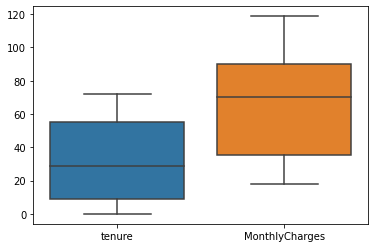

In [8]:
# Checking for outliers
sns.boxplot(data=df[['tenure','MonthlyCharges']])

<AxesSubplot:>

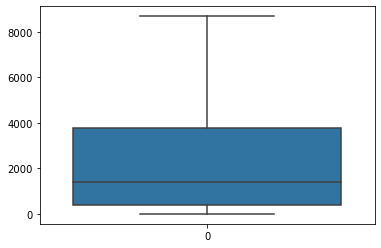

In [9]:
sns.boxplot(data=df['TotalCharges'])

<AxesSubplot:>

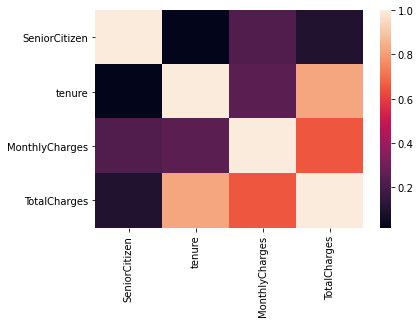

In [10]:
sns.heatmap(df.corr())

In [11]:
churn = df['Churn'].value_counts()
churn

No     5174
Yes    1869
Name: Churn, dtype: int64

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

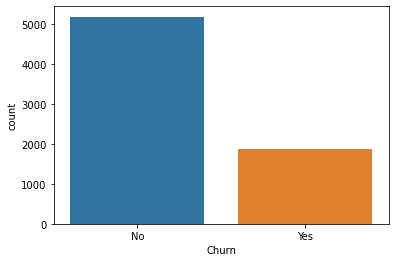

In [12]:
sns.countplot(df['Churn'])

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

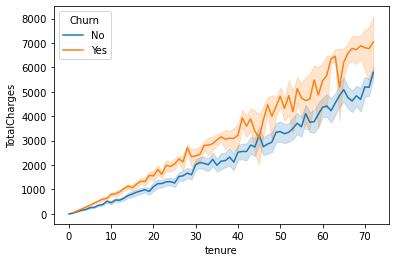

In [13]:
sns.lineplot(x='tenure',y='TotalCharges',hue='Churn',data=df)

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

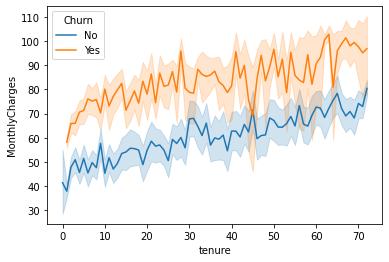

In [14]:
sns.lineplot(x='tenure',y='MonthlyCharges',hue='Churn',data=df)

<AxesSubplot:xlabel='Contract', ylabel='count'>

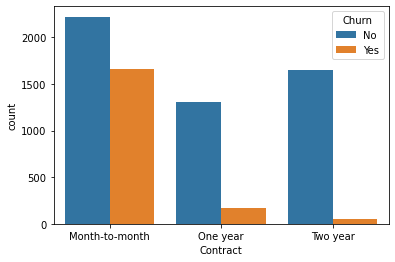

In [15]:
sns.countplot(x='Contract',data=df,hue='Churn')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

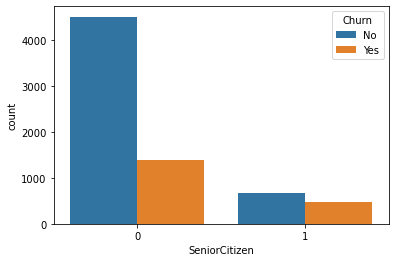

In [16]:
sns.countplot(x='SeniorCitizen',data=df,hue='Churn')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

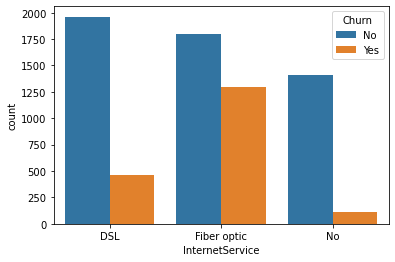

In [17]:
sns.countplot(x='InternetService',data=df,hue='Churn')

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

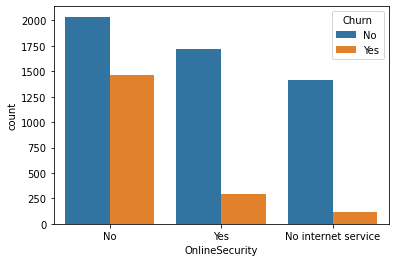

In [18]:
sns.countplot(x='OnlineSecurity',data=df,hue='Churn')

In [19]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

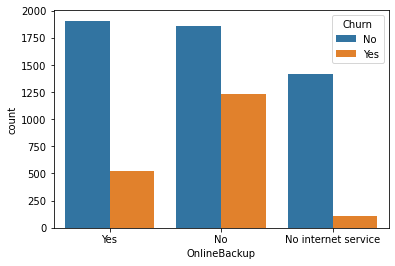

In [20]:
sns.countplot(x='OnlineBackup',data=df,hue='Churn')

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop(['Churn','customerID'],axis=1)

In [23]:
X = pd.get_dummies(X)

In [24]:
y = df['Churn']

In [25]:
y = pd.get_dummies(y,drop_first=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [28]:
dtree = DecisionTreeClassifier()

In [44]:
dtree2 = dtree.fit(X_train,y_train)

In [61]:
plt.figure(figsize=(250,280))
tree.plot_tree(dtree2,feature_names=X.columns,max_depth=2)
plt.show()

In [31]:
predictions = dtree.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1281  258]
 [ 296  278]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1539
           1       0.52      0.48      0.50       574

    accuracy                           0.74      2113
   macro avg       0.67      0.66      0.66      2113
weighted avg       0.73      0.74      0.73      2113



In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(n_estimators=200)

In [36]:
rfc.fit(X_train,y_train)

<ipython-input-36-0b00acaf8842>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=200)

In [37]:
rfc_pred = rfc.predict(X_test)

In [38]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[1406  133]
 [ 304  270]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1539
           1       0.67      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

